Evaluate the mAP50 of a baseline - ALv4 on p3v6, NS_val and bgs, and both combined.

In [19]:
from ultralytics import YOLO
import pandas as pd
import os
from pathlib import Path


In [20]:
def load_model(model_version):
    project = '/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/'
    model_folder_path = os.path.join(project, 'models', model_version)
    model_path = os.path.join(model_folder_path, 'weights/best.pt')
    return YOLO(model_path)

In [21]:
source_yaml = '/vol/biomedic3/bglocker/ugproj/tk1420/datasets/p3v6/data_config.yaml'
target_yaml = '/vol/biomedic3/bglocker/ugproj/tk1420/AL_target-eval.yaml'
combined_yaml = '/vol/biomedic3/bglocker/ugproj/tk1420/AL_combined-eval.yaml'

In [ ]:
model_names = [
    'ALv4_v8n_augs',
    # 'report-ALv4-v8n_augs_good_bbs_patience_150_tv_split',
    'report-ALv4-v8n_augs_good_bbs_patience_150',
    'report-ALv4-v8n_augs_mosaic1',
    'report-ALv4-v8n_augs_high_iou',
    # # 'ALv3_v1-v8n_augs10', # had a checkpoint
    # "report-Alv3-v8n_augs",
    # "report-ALv3-v8n_augs_good_bbs",
    # 'report-ALv3-v8n_augs_good_bbs_lower_hsv', 
    # 'report-ALv3-v8n_augs_good_bbs_patience_150_redo2',
    # 'report-ALv2-v8n_augs_good_bbs',
    # 'report-ALv2-v8n_augs_good_bbs_patience_150',
    # 'report-Alv2-v8n_augs2', # had low hsv augs
    # 'report-Alv2-v8n_augs3',
    # 'report-Alv1-v8n_augs-good-bbs',
    # 'report-Alv1-v8n_augs-good-bbs_lower_hsv',
    # 'report-Alv1-v8n_augs',
    # 'report-Alv1_v8n_augs_good_bbs_mosaic1',
    # 'report-v8n_augs_high_hsv',
    # 'report-v8n_augs',
    # 'p3v6_n2',
    # 'p3v6_v8n_1000e_mosaic0',
    # 'report-v8n_augs_mosaic1',
    # 'p3v6_v8s_1000e_mosaic0.8_perspective0.0005_cutmix0.1'
]
# model_names = [
#     'ALv4_v8n_augs',
#     # 'report-ALv4-v8n_augs_good_bbs_patience_150_tv_split',
#     # 'report-ALv4-v8n_augs_good_bbs_patience_150',
#     # # 'ALv3_v1-v8n_augs10', # had a checkpoint
#     "report-Alv3-v8n_augs",
#     # "report-ALv3-v8n_augs_good_bbs",
#     # 'report-ALv3-v8n_augs_good_bbs_lower_hsv', 
#     # 'report-ALv3-v8n_augs_good_bbs_patience_150_redo',
#     # 'report-ALv2-v8n_augs_good_bbs',
#     # 'report-ALv2-v8n_augs_good_bbs_patience_150',
#     # 'report-Alv2-v8n_augs2', # had low hsv augs
#     'report-Alv2-v8n_augs3',
#     # 'report-Alv1-v8n_augs-good-bbs',
#     # 'report-Alv1-v8n_augs-good-bbs_lower_hsv',
#     'report-Alv1-v8n_augs',
#     # 'report-v8n_augs_high_hsv',
#     'report-v8n_augs',
#     # 'p3v6_n2'
# ]

job_name = 'AL-eval'
conf = 0.001

# map of modelname to dataset to map
mAP = dict((model_name,{'source': 0.0, 'target': 0.0, 'combined': 0.0}) for model_name in model_names)
recall_map = dict((model_name,{'source': 0.0, 'target': 0.0, 'combined': 0.0}) for model_name in model_names)
motas = dict((model_name, 0.0) for model_name in model_names)

In [5]:
# from evaluate_yolo_tracker import evaluate_per_sequence, evaluate 
# # Eval prod with plots
# model_name = 'st_prod'
# conf = 0.001
# model_path = "/vol/biomedic3/bglocker/ugproj/tk1420/sharktrack/models/sharktrack.pt"
# # metrics_per_sequence, track_time, device, all_aligned_annotations = evaluate_per_sequence(model_path, conf, iou_association_threshold=0.5,imgsz=640, tracker_type='tracker_5fps.yaml', show=False)
# # print(f"Per-sequence metrics for {model_name}:")
# # for seq, metrics in metrics_per_sequence.items():
# #     print(f"Sequence: {seq}, Metrics: {metrics}")
    
# # # cumulative
# # mota = sum(metrics['MOTA'] for metrics in metrics_per_sequence.values()) / len(metrics_per_sequence)
# # motp = sum(metrics['MOTP'] for metrics in metrics_per_sequence.values()) / len(metrics_per_sequence)
# # idf1 = sum(metrics['IDF1'] for metrics in metrics_per_sequence.values()) / len(metrics_per_sequence)
# # print(f"Cumulative Metrics for {model_name}: MOTA: {mota:.4f}, MOTP: {motp:.4f}, IDF1: {idf1:.4f}")

# model = YOLO(model_path)
# results = model.val(name=f"{job_name}_{model_name}_val_conf{conf:.4f}_",
#                 data=source_yaml,
#                 conf=conf,
#                 plots=True,
#                 save_json=False,
#                 verbose=False,
#                 iou=0.5)

# # Print confusion matrix
# cm = results.confusion_matrix.matrix
# print(f"{model_name} at conf: {conf:.4f}")
# print(cm)
# print(f"Best mAP50: {results.results_dict['metrics/mAP50(B)']}")
# print(f"Best recall: {results.results_dict['metrics/recall(B)']}")

In [6]:
# from evaluate_yolo_tracker import evaluate
# # evaluate tracking with evaluate_per_sequence
# import gc
# # tracking_conf = 0.2
# tracking_conf = 0.01
# iou = 0.5

# for model_name in model_names:
#     print(f'Evaluating {model_name}...')
    
#     model_path = f'/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/models/{model_name}/weights/best.pt'
#     # evaluate source dataset
#     # res = evaluate_per_sequence(model_path, tracking_conf, iou, imgsz=640, tracker_type='tracker_5fps.yaml')
#     macro_mota, _, _, _, _ = evaluate(model_path, tracking_conf, iou, imgsz=640, tracker='tracker_5fps.yaml')
#     motas[model_name] = macro_mota
#     gc.collect()

In [7]:
    # print the mota in a df including the model name    
df = pd.DataFrame({
    'Model': [model_name for model_name in model_names],
    'mota': [motas[model_name] for model_name in model_names]
    })
print(df.to_string(index = False))

                  Model  mota
                p3v6_n2   0.0
report-v8n_augs_mosaic1   0.0


In [25]:
# Load the models in a dictionary
models = {model_name: load_model(model_name) for model_name in model_names}

In [26]:
# Now for just the target evaluation
data_yaml = target_yaml

for model_name, model in models.items():

    results = model.val(name=f"{job_name}_{model_name}_val_conf{conf:.4f}_",
                    data=data_yaml,
                    conf=conf,
                    plots=True,
                    save_json=False,
                    verbose=False,
                    iou=0.5)

    # Print confusion matrix
    cm = results.confusion_matrix.matrix
    print(f"{model_name} at conf: {conf:.4f}")
    print(cm)
    print(f"Best mAP50: {results.results_dict['metrics/mAP50(B)']}")
    print(f"Best recall: {results.results_dict['metrics/recall(B)']}")
    mAP[model_name]['target'] = results.results_dict['metrics/mAP50(B)']
    recall_map[model_name]['target'] = results.results_dict['metrics/recall(B)']

Ultralytics 8.3.0 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080, 15955MiB)


Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /vol/biomedic3/bglocker/ugproj/tk1420/datasets/NorthSea1_val/val/labels... 507 images, 327 backgrounds, 0 corrupt: 100%|██████████| 757/757 [00:00<00:00, 1729.43it/s]

val: New cache created: /vol/biomedic3/bglocker/ugproj/tk1420/datasets/NorthSea1_val/val/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:33<00:00,  1.43it/s]


                   all        757        430      0.784      0.784      0.758       0.52
Speed: 0.7ms preprocess, 1.2ms inference, 0.0ms loss, 12.5ms postprocess per image
Results saved to /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/runs/detect/AL-eval_report-Alv1-v8n_augs-good-bbs_val_conf0.0010_19
report-Alv1-v8n_augs-good-bbs at conf: 0.0010
[[        330           6]
 [        100           0]]
Best mAP50: 0.7583172452243754
Best recall: 0.7837209302325582
Ultralytics 8.3.0 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080, 15955MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /vol/biomedic3/bglocker/ugproj/tk1420/datasets/NorthSea1_val/val/labels.cache... 507 images, 327 backgrounds, 0 corrupt: 100%|██████████| 757/757 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:37<00:00,  1.28it/s]


                   all        757        430      0.556      0.709       0.55      0.298
Speed: 0.7ms preprocess, 1.2ms inference, 0.0ms loss, 16.6ms postprocess per image
Results saved to /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/runs/detect/AL-eval_report-Alv1-v8n_augs_val_conf0.0010_42
report-Alv1-v8n_augs at conf: 0.0010
[[        332          15]
 [         98           0]]
Best mAP50: 0.5495061438434843
Best recall: 0.7093023255813954
Ultralytics 8.3.0 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080, 15955MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /vol/biomedic3/bglocker/ugproj/tk1420/datasets/NorthSea1_val/val/labels.cache... 507 images, 327 backgrounds, 0 corrupt: 100%|██████████| 757/757 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]


                   all        757        430      0.758      0.695       0.76      0.498
Speed: 0.7ms preprocess, 1.2ms inference, 0.0ms loss, 13.4ms postprocess per image
Results saved to /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/runs/detect/AL-eval_report-Alv1_v8n_augs_good_bbs_mosaic1_val_conf0.0010_
report-Alv1_v8n_augs_good_bbs_mosaic1 at conf: 0.0010
[[        310          26]
 [        120           0]]
Best mAP50: 0.760351290962026
Best recall: 0.6953488372093023


In [27]:
df = pd.DataFrame({
    'Model': model_names,
    'Target mAP50': [mAP[name]['target'] for name in model_names],
    'Target Recall': [recall_map[name]['target'] for name in model_names]
})

print(df.to_string(index=False))

                                Model  Target mAP50  Target Recall
        report-Alv1-v8n_augs-good-bbs      0.758317       0.783721
                 report-Alv1-v8n_augs      0.549506       0.709302
report-Alv1_v8n_augs_good_bbs_mosaic1      0.760351       0.695349


In [ ]:
# Print as a table of recall and map against modelname
df = pd.DataFrame({
    'Model': model_names,
    'Target mAP50': [mAP[name]['target'] for name in model_names],
    'Target Recall': [recall_map[name]['target'] for name in model_names]
})

print(df.to_string(index=False))

                                  Model  Target mAP50  Target Recall
                          ALv4_v8n_augs      0.796496       0.965670
                   report-Alv3-v8n_augs      0.768236       0.941909
                  report-Alv2-v8n_augs3      0.725369       0.777494
          report-Alv1-v8n_augs-good-bbs      0.800047       0.735095
report-Alv1-v8n_augs-good-bbs_lower_hsv      0.638382       0.817042
                   report-Alv1-v8n_augs      0.612556       0.742739
                        report-v8n_augs      0.290484       0.385892


In [6]:
# Now on source domain evaluation
data_yaml = source_yaml

for model_name, model in models.items():

    results = model.val(name=f"{job_name}_{model_name}_val_conf{conf:.4f}_",
                    data=data_yaml,
                    conf=conf,
                    plots=True,
                    save_json=False,
                    verbose=False,
                    iou=0.5)

    # Print confusion matrix
    cm = results.confusion_matrix.matrix
    print(f">{model_name} at conf: {conf:.4f}")
    print(cm)
    print(f"Best mAP50: {results.results_dict['metrics/mAP50(B)']}")
    mAP[model_name]['source'] = results.results_dict['metrics/mAP50(B)']
    recall_map[model_name]['source'] = results.results_dict['metrics/recall(B)']
    print(f"Best Recall: {results.results_dict['metrics/recall(B)']}")

Ultralytics 8.3.0 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080, 15955MiB)


Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /vol/biomedic3/bglocker/ugproj/tk1420/datasets/p3v6/val/labels.cache... 980 images, 242 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:12<00:00,  5.15it/s]


                   all        980       1174      0.871      0.794      0.865      0.575
Speed: 0.3ms preprocess, 0.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/runs/detect/AL-eval_report-v8n_augs_high_hsv_val_conf0.0010_12
>report-v8n_augs_high_hsv at conf: 0.0010
[[        937          60]
 [        237           0]]
Best mAP50: 0.8646370487058858
Best Recall: 0.7938671209540034
Ultralytics 8.3.0 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080, 15955MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /vol/biomedic3/bglocker/ugproj/tk1420/datasets/p3v6/val/labels.cache... 980 images, 242 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:24<00:00,  2.53it/s]


                   all        980       1174      0.886       0.76       0.86      0.556
Speed: 0.4ms preprocess, 0.7ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/runs/detect/AL-eval_report-v8n_augs_val_conf0.0010_62
>report-v8n_augs at conf: 0.0010
[[        932          72]
 [        242           0]]
Best mAP50: 0.8601858849789616
Best Recall: 0.7601166430139977
Ultralytics 8.3.0 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4080, 15955MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /vol/biomedic3/bglocker/ugproj/tk1420/datasets/p3v6/val/labels.cache... 980 images, 242 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:25<00:00,  2.48it/s]


                   all        980       1174      0.864      0.783      0.847      0.561
Speed: 0.4ms preprocess, 0.8ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/runs/detect/AL-eval_p3v6_n2_val_conf0.0010_9
>p3v6_n2 at conf: 0.0010
[[        927          65]
 [        247           0]]
Best mAP50: 0.8466963454988307
Best Recall: 0.782793867120954


In [7]:
# Print Source map and recall against modelname
df = pd.DataFrame({
    'Model': model_names,
    'Source mAP50': [mAP[name]['source'] for name in model_names],
    'Source Recall': [recall_map[name]['source'] for name in model_names]
})
    
print(df.to_string(index=False))

                   Model  Source mAP50  Source Recall
report-v8n_augs_high_hsv      0.864637       0.793867
         report-v8n_augs      0.860186       0.760117
                 p3v6_n2      0.846696       0.782794


In [ ]:
# Combined evaluation
data_yaml = combined_yaml

for model_name in model_names:
    model = load_model(model_name)

    results = model.val(name=f"{job_name}_{model_name}_val_conf{conf:.4f}_",
                    data=data_yaml,
                    conf=conf,
                    plots=False,
                    save_json=False,
                    verbose=False,
                    iou=0.5)

    # Print confusion matrix
    cm = results.confusion_matrix.matrix
    mAP[model_name]['combined'] = results.results_dict['metrics/mAP50(B)']
    recall_map[model_name]['combined'] = results.results_dict['metrics/recall(B)']
    print(f"{model_name} at conf: {conf:.4f}")
    print(cm)
    print(f"Best mAP50: {results.results_dict['metrics/mAP50(B)']}")
    print(f"Best Recall: {results.results_dict['metrics/recall(B)']}")

In [ ]:
# create a dataframe with model name, target map, target recall, source map and recall, and mota
df = pd.DataFrame({
    'Model': model_names,
    'Target mAP50': [mAP[name]['target'] for name in model_names],
    'Target Recall': [recall_map[name]['target'] for name in model_names],
    'MOTA': [motas[name] for name in model_names],
    'Source mAP50': [mAP[name]['source'] for name in model_names],
    'Source Recall': [recall_map[name]['source'] for name in model_names],
})  
print(df.to_string(index=False))

                                     Model  Target mAP50  Target Recall  MOTA  Source mAP50  Source Recall
report-ALv4-v8n_augs_good_bbs_patience_150      0.942175       0.936656  0.76      0.857547       0.755067
   report-ALv3-v8n_augs_good_bbs_lower_hsv      0.664850       0.906977  0.78      0.849804       0.763703
report-ALv2-v8n_augs_good_bbs_patience_150      0.896766       0.906977  0.77      0.867202       0.770869
             report-Alv1-v8n_augs-good-bbs      0.758317       0.783721  0.78      0.875803       0.787053
                           report-v8n_augs      0.294009       0.465116  0.64      0.860186       0.760117


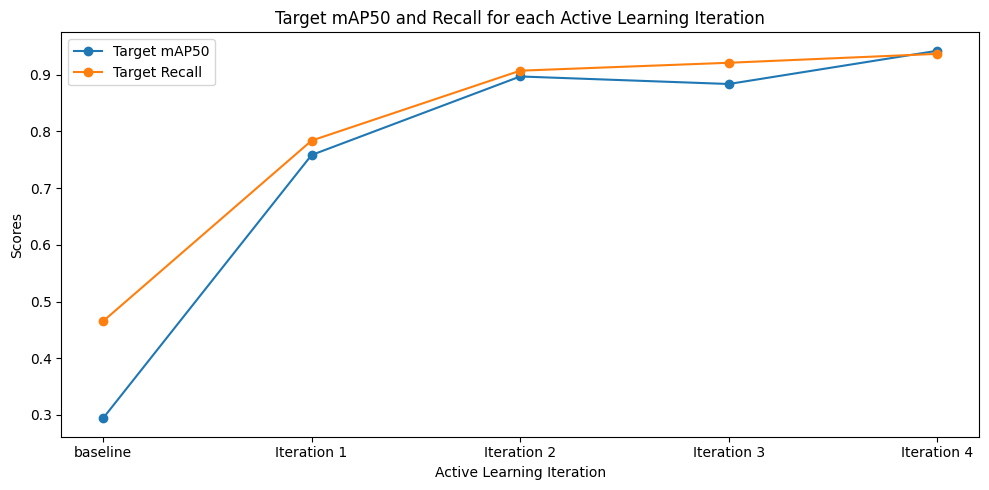

In [23]:
# Plot target map and recall on a graph up 1, AL iteration ranging from 0 to 4, the y axis is map and recall
# It's a scatter plot with points connected by lines
import matplotlib.pyplot as plt
x_labels = ['baseline','Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']
y1 = [mAP[name]['target'] for name in model_names]
y1.reverse()  # Reverse the order to match x_labels
y2 = [recall_map[name]['target'] for name in model_names]
y2.reverse()  # Reverse the order to match x_labels

plt.figure(figsize=(10, 5))
plt.plot(x_labels, y1, marker='o', label='Target mAP50')
plt.plot(x_labels, y2, marker='o', label='Target Recall')
# plt.xticks(rotation=45)
plt.xlabel('Active Learning Iteration')
plt.ylabel('Scores')
plt.title('Target mAP50 and Recall for each Active Learning Iteration')
plt.legend()
plt.tight_layout()
# save as an svg file
plt.savefig('/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/AL_good_bbs_target_map_recall', bbox_inches='tight', format='svg')


In [24]:
# Plot the mota per model as a scatter plot with points connected by lines
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
x_labels = ['baseline','Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']
motas = [motas[i] for i in range(len(model_names)-1, -1, -1)]  # Reverse the order to match x_labels
plt.plot(x_labels, motas, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('MOTA')
plt.title('MOTA per Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('AL-mota_per_model_bad_bbs.png')

[0.76, 0.76, 0.77, 0.78, 0.64]


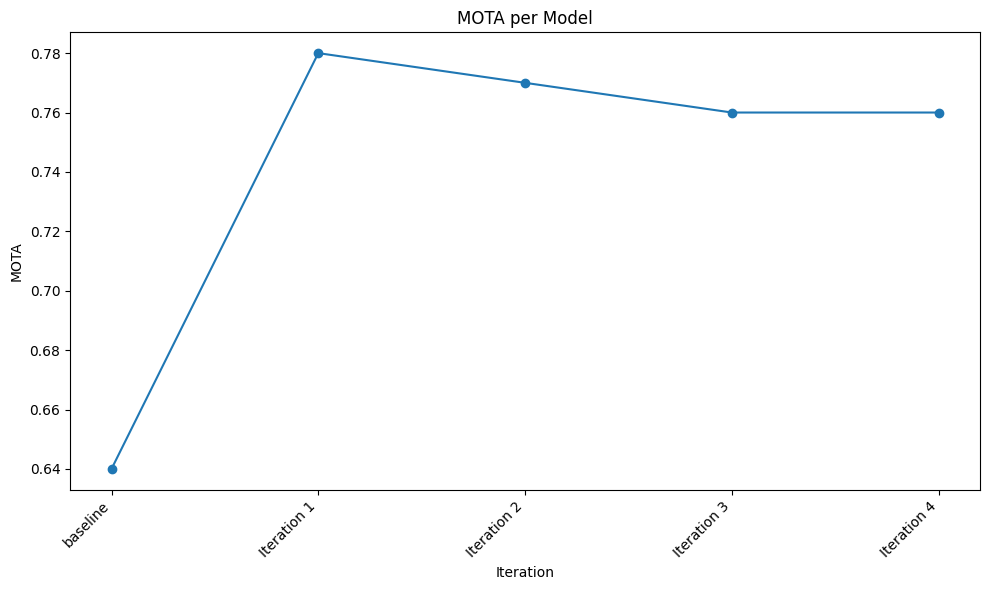

In [ ]:
# Plot the mota per model as a scatter plot with points connected by lines
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
x_labels = ['baseline','Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']
motas = [list(motas.values())[i] for i in range(len(model_names)-1, -1, -1)] 
plt.plot(x_labels, motas, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('MOTA')
plt.title('MOTA per Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

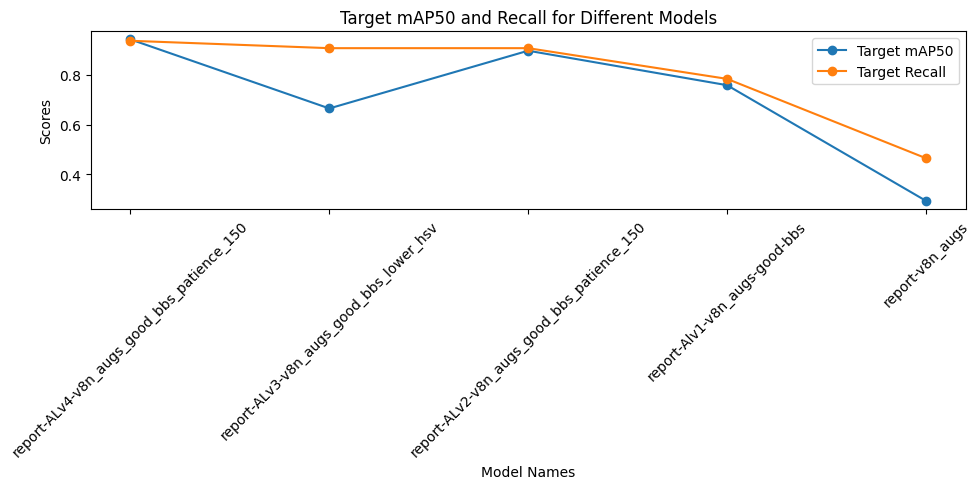

In [18]:
# Plot target map and recall on a graph up 1, AL iteration ranging from 0 to 4, the y axis is map and recall
# It's a scatter plot with points connected by lines
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(model_names))  # the label locations
y1 = [mAP[name]['target'] for name in model_names]
y2 = [recall_map[name]['target'] for name in model_names]
plt.figure(figsize=(10, 5))
plt.plot(x, y1, marker='o', label='Target mAP50')
plt.plot(x, y2, marker='o', label='Target Recall')
plt.xticks(x, model_names, rotation=45)
plt.xlabel('Model Names')
plt.ylabel('Scores')
plt.title('Target mAP50 and Recall for Different Models')
plt.legend()
plt.tight_layout()


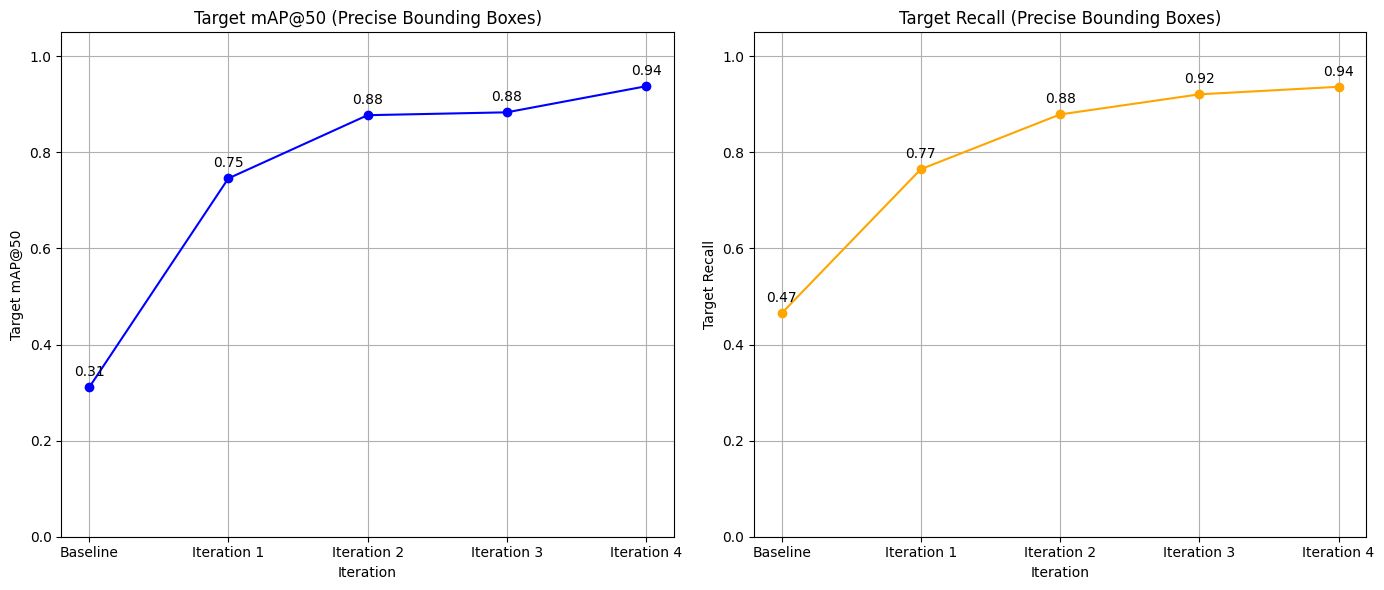

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Precise Bounding Boxes Data
labels = ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']
target_map50 = [0.310690, 0.745910, 0.877516, 0.883487, 0.937756]
target_recall = [0.465116, 0.765116, 0.879070, 0.920930, 0.936656]

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot mAP@50
axes[0].plot(labels, target_map50, marker='o', linestyle='-', color='blue')
axes[0].set_title('Target mAP@50 (Precise Bounding Boxes)')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Target mAP@50')
axes[0].set_ylim(0, 1.05)
axes[0].grid(True)

# Annotate mAP@50 points
for i in range(len(labels)):
    axes[0].annotate(f"{target_map50[i]:.2f}", (labels[i], target_map50[i]), textcoords="offset points", xytext=(0,8), ha='center')

# Plot Recall
axes[1].plot(labels, target_recall, marker='o', linestyle='-', color='orange')
axes[1].set_title('Target Recall (Precise Bounding Boxes)')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Target Recall')
axes[1].set_ylim(0, 1.05)
axes[1].grid(True)

# Annotate Recall points
for i in range(len(labels)):
    axes[1].annotate(f"{target_recall[i]:.2f}", (labels[i], target_recall[i]), textcoords="offset points", xytext=(0,8), ha='center')

# Final layout tweaks
plt.tight_layout()
plt.savefig('/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/AL_good_bbs_map50_recall.svg', bbox_inches='tight', format='svg')
plt.show()



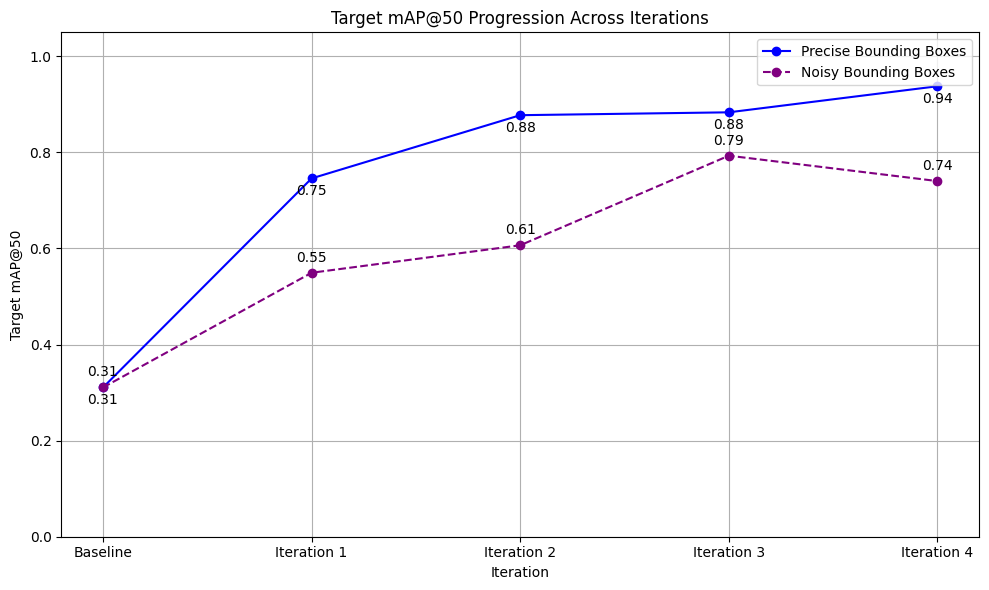

In [2]:
# Good vs Bad bboxes map50
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame 1 (original models)
df1 = pd.DataFrame({
    "Label": ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4'],
    "Target mAP50": [0.310690, 0.549506, 0.606697, 0.793206, 0.740331]
})

# DataFrame 2 (improved models)
df2 = pd.DataFrame({
    "Label": ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4'],
    "Target mAP50": [0.310690, 0.745910, 0.877516, 0.883487, 0.937756]
})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Label'], df2['Target mAP50'], marker='o', linestyle='-', label='Precise Bounding Boxes', color='blue')
plt.plot(df1['Label'], df1['Target mAP50'], marker='o', linestyle='--', label='Noisy Bounding Boxes', color='purple')

# Labels and formatting
plt.title('Target mAP@50 Progression Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Target mAP@50')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

# Annotate points
for i in range(len(df1)):
    plt.annotate(f"{df1['Target mAP50'][i]:.2f}", (df1['Label'][i], df1['Target mAP50'][i]), textcoords="offset points", xytext=(0,8), ha='center')
    plt.annotate(f"{df2['Target mAP50'][i]:.2f}", (df2['Label'][i], df2['Target mAP50'][i]), textcoords="offset points", xytext=(0,-12), ha='center')

plt.tight_layout()
plt.savefig('/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/AL_good_vs_bad_bbs_map50.svg', bbox_inches='tight', format='svg')
plt.show()



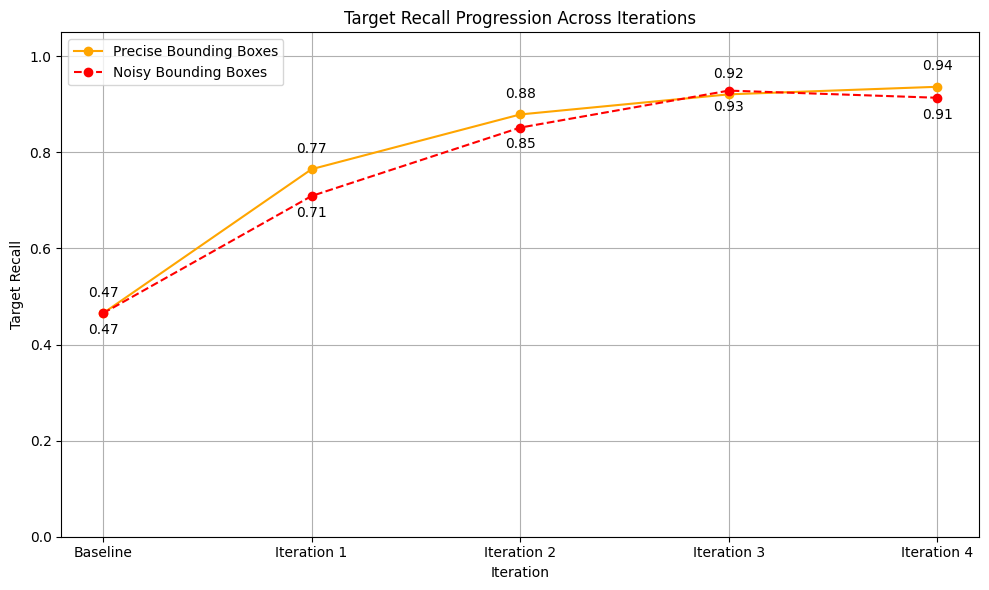

<Figure size 640x480 with 0 Axes>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame 1 (original models)
df1 = pd.DataFrame({
    "Label": ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4'],
    "Target Recall": [0.465116, 0.709302, 0.851672, 0.928682, 0.913773]
})

# DataFrame 2 (improved models)
df2 = pd.DataFrame({
    "Label": ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4'],
    "Target Recall": [0.465116, 0.765116, 0.879070, 0.920930, 0.936656]
})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2['Label'], df2['Target Recall'], marker='o', linestyle='-', label='Precise Bounding Boxes', color='orange')
plt.plot(df1['Label'], df1['Target Recall'], marker='o', linestyle='--', label='Noisy Bounding Boxes', color='red')

# Labels and formatting
plt.title('Target Recall Progression Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Target Recall')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

# Annotate points
for i in range(len(df1)):
    plt.annotate(f"{df1['Target Recall'][i]:.2f}", (df1['Label'][i], df1['Target Recall'][i]), textcoords="offset points", xytext=(0,-15), ha='center')
    plt.annotate(f"{df2['Target Recall'][i]:.2f}", (df2['Label'][i], df2['Target Recall'][i]), textcoords="offset points", xytext=(0,12), ha='center')

plt.tight_layout()
plt.show()

plt.savefig('/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/AL_good_vs_bad_bbs_recall.svg', bbox_inches='tight', format='svg')


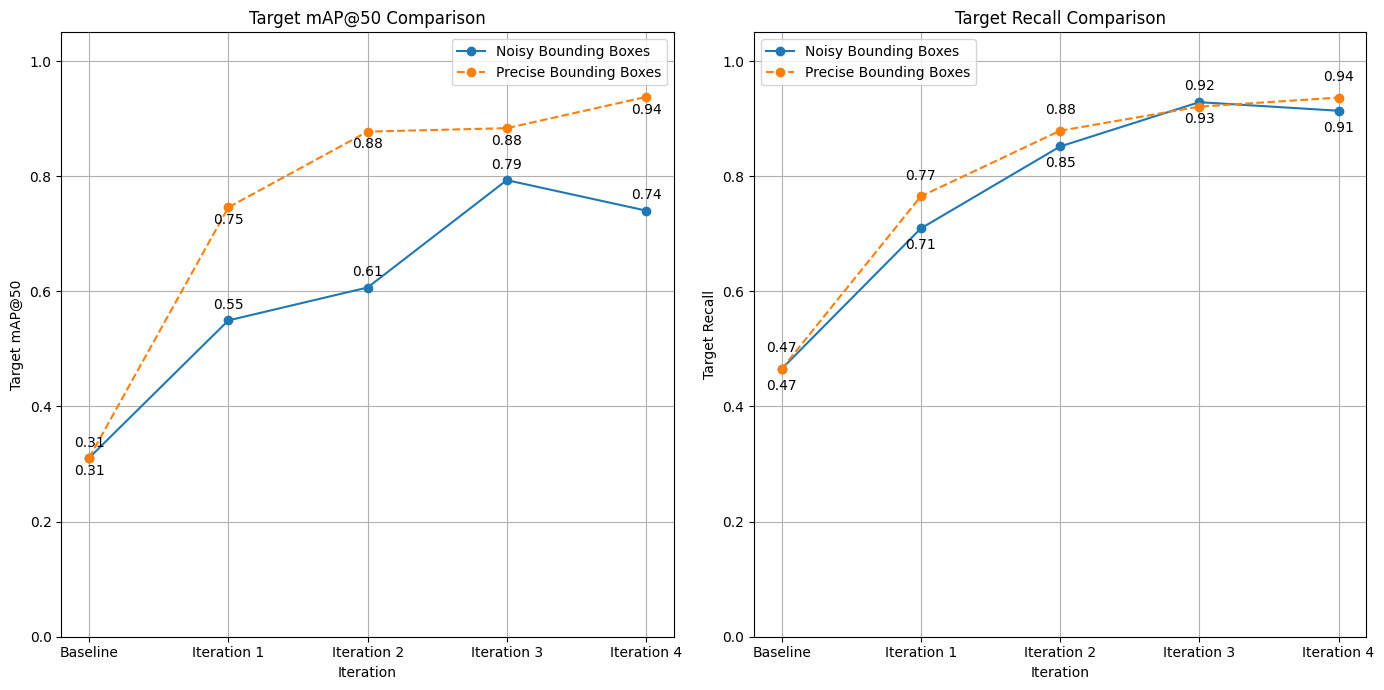

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Labels for iterations
labels = ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']

# Data: Target mAP@50
map_noisy = [0.310690, 0.549506, 0.606697, 0.793206, 0.740331]
map_precise = [0.310690, 0.745910, 0.877516, 0.883487, 0.937756]

# Data: Target Recall
recall_noisy = [0.465116, 0.709302, 0.851672, 0.928682, 0.913773]
recall_precise = [0.465116, 0.765116, 0.879070, 0.920930, 0.936656]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

# Plot mAP@50
axes[0].plot(labels, map_noisy, marker='o', linestyle='-', label='Noisy Bounding Boxes')
axes[0].plot(labels, map_precise, marker='o', linestyle='--', label='Precise Bounding Boxes')
axes[0].set_title('Target mAP@50 Comparison')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Target mAP@50')
axes[0].set_ylim(0, 1.05)
axes[0].grid(True)
axes[0].legend()

# Annotate mAP@50 points
for i in range(len(labels)):
    axes[0].annotate(f"{map_noisy[i]:.2f}", (labels[i], map_noisy[i]), textcoords="offset points", xytext=(0,8), ha='center')
    axes[0].annotate(f"{map_precise[i]:.2f}", (labels[i], map_precise[i]), textcoords="offset points", xytext=(0,-12), ha='center')

# Plot Recall
axes[1].plot(labels, recall_noisy, marker='o', linestyle='-', label='Noisy Bounding Boxes')
axes[1].plot(labels, recall_precise, marker='o', linestyle='--', label='Precise Bounding Boxes')
axes[1].set_title('Target Recall Comparison')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Target Recall')
axes[1].set_ylim(0, 1.05)
axes[1].grid(True)
axes[1].legend()

# Annotate Recall points
for i in range(len(labels)):
    axes[1].annotate(f"{recall_noisy[i]:.2f}", (labels[i], recall_noisy[i]), textcoords="offset points", xytext=(0,-15), ha='center')
    axes[1].annotate(f"{recall_precise[i]:.2f}", (labels[i], recall_precise[i]), textcoords="offset points", xytext=(0,12), ha='center')

# Final layout
plt.tight_layout()
plt.savefig('/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/AL_good_vs_bad_bbs_map50_recall_side_by_side.svg', format='svg')
plt.show()

Saved plot to: /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/mAP_gain_vs_annotation_minutes.svg


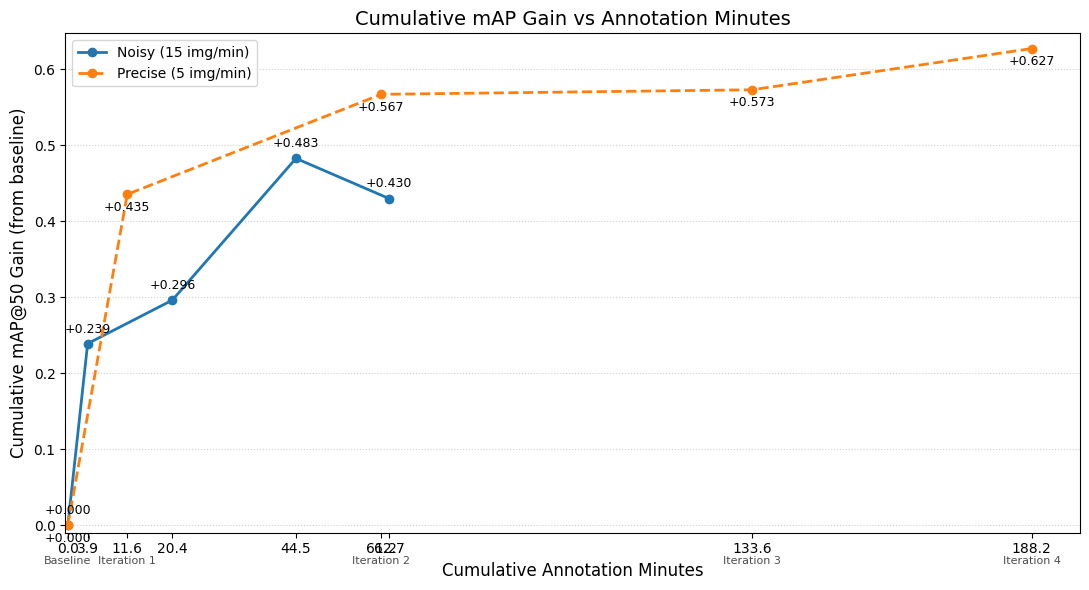

In [1]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']

map_noisy =  [0.310690, 0.549506, 0.606697, 0.793206, 0.740331]
map_precise = [0.310690, 0.745910, 0.877516, 0.883487, 0.937756]

# Cumulative annotated target training samples (baseline assumed 0)
samples_cumulative = [0, 58, 306, 668, 941]

# Annotation rates (samples per minute)
rate_noisy = 15.0   # noisy bounding-box annotations per minute
rate_precise = 5.0  # precise bounding-box annotations per minute

# --- Compute cumulative annotation minutes for each annotation style ---
minutes_cumulative_noisy = [s / rate_noisy for s in samples_cumulative]
minutes_cumulative_precise = [s / rate_precise for s in samples_cumulative]

# --- Compute cumulative mAP gain (delta from baseline) ---
baseline_map = map_noisy[0]   # both baseline values are the same here
map_gain_noisy = [m - baseline_map for m in map_noisy]
map_gain_precise = [m - baseline_map for m in map_precise]

# --- Plotting ---
fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(minutes_cumulative_noisy, map_gain_noisy,
        marker='o', linestyle='-', linewidth=2, label='Noisy (15 img/min)')
ax.plot(minutes_cumulative_precise, map_gain_precise,
        marker='o', linestyle='--', linewidth=2, label='Precise (5 img/min)')

# Annotate points with iteration labels and numeric values
for i, lab in enumerate(labels):
    # numeric annotation for noisy
    ax.annotate(f"{map_gain_noisy[i]:+.3f}",
                (minutes_cumulative_noisy[i], map_gain_noisy[i]),
                textcoords="offset points", xytext=(0,8), ha='center', fontsize=9)
    # numeric annotation for precise (offset a bit downward to avoid overlap)
    ax.annotate(f"{map_gain_precise[i]:+.3f}",
                (minutes_cumulative_precise[i], map_gain_precise[i]),
                textcoords="offset points", xytext=(0,-12), ha='center', fontsize=9)
    # iteration label on x-axis (below)
    ax.annotate(lab,
                (minutes_cumulative_precise[i], 0),
                textcoords="offset points", xytext=(0,-28), ha='center', fontsize=8, alpha=0.7)

# Labels, title, grid, legend
ax.set_xlabel('Cumulative Annotation Minutes', fontsize=12)
ax.set_ylabel('Cumulative mAP@50 Gain (from baseline)', fontsize=12)
ax.set_title('Cumulative mAP Gain vs Annotation Minutes', fontsize=14)
ax.grid(True, axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper left')

# Nice tight limits and formatting
x_max = max(minutes_cumulative_precise[-1], minutes_cumulative_noisy[-1])
ax.set_xlim(-0.5, x_max * 1.05)
ax.set_ylim(min(min(map_gain_noisy), min(map_gain_precise)) - 0.01,
            max(max(map_gain_noisy), max(map_gain_precise)) + 0.02)

# Make x-axis ticks include the iteration points (use sorted unique combined minutes)
tick_positions = sorted(set(minutes_cumulative_noisy + minutes_cumulative_precise))
ax.set_xticks(tick_positions)
ax.set_xticklabels([f"{t:.1f}" for t in tick_positions])

plt.tight_layout()

# Save (change path as needed)
outpath = '/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/mAP_gain_vs_annotation_minutes.svg'
plt.savefig(outpath, format='svg')
print(f"Saved plot to: {outpath}")

plt.show()


Saved plot to: /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/Recall_gain_vs_annotation_minutes.svg


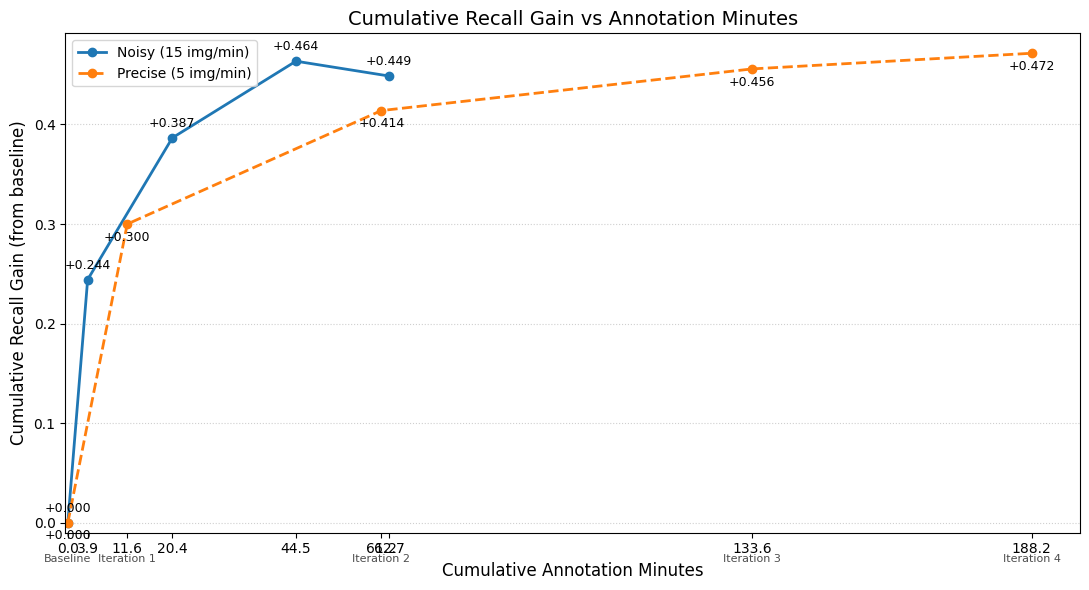

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data (from you) ---
labels = ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']

recall_noisy =  [0.465116, 0.709302, 0.851672, 0.928682, 0.913773]
recall_precise = [0.465116, 0.765116, 0.879070, 0.920930, 0.936656]

# Cumulative annotated target training samples (baseline assumed 0)
samples_cumulative = [0, 58, 306, 668, 941]

# Annotation rates (samples per minute)
rate_noisy = 15.0   # noisy bounding-box annotations per minute
rate_precise = 5.0  # precise bounding-box annotations per minute

# --- Compute cumulative annotation minutes for each annotation style ---
minutes_cumulative_noisy = [s / rate_noisy for s in samples_cumulative]
minutes_cumulative_precise = [s / rate_precise for s in samples_cumulative]

# --- Compute cumulative Recall gain (delta from baseline) ---
baseline_recall = recall_noisy[0]  # baseline (both are the same here)
recall_gain_noisy = [r - baseline_recall for r in recall_noisy]
recall_gain_precise = [r - baseline_recall for r in recall_precise]

# --- Plotting ---
fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(minutes_cumulative_noisy, recall_gain_noisy,
        marker='o', linestyle='-', linewidth=2, label='Noisy (15 img/min)')
ax.plot(minutes_cumulative_precise, recall_gain_precise,
        marker='o', linestyle='--', linewidth=2, label='Precise (5 img/min)')

# Annotate points with iteration labels and numeric values
for i, lab in enumerate(labels):
    ax.annotate(f"{recall_gain_noisy[i]:+.3f}",
                (minutes_cumulative_noisy[i], recall_gain_noisy[i]),
                textcoords="offset points", xytext=(0,8), ha='center', fontsize=9)
    ax.annotate(f"{recall_gain_precise[i]:+.3f}",
                (minutes_cumulative_precise[i], recall_gain_precise[i]),
                textcoords="offset points", xytext=(0,-12), ha='center', fontsize=9)
    ax.annotate(lab,
                (minutes_cumulative_precise[i], 0),
                textcoords="offset points", xytext=(0,-28), ha='center', fontsize=8, alpha=0.7)

# Labels, title, grid, legend
ax.set_xlabel('Cumulative Annotation Minutes', fontsize=12)
ax.set_ylabel('Cumulative Recall Gain (from baseline)', fontsize=12)
ax.set_title('Cumulative Recall Gain vs Annotation Minutes', fontsize=14)
ax.grid(True, axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper left')

# Axis limits and ticks
x_max = max(minutes_cumulative_precise[-1], minutes_cumulative_noisy[-1])
ax.set_xlim(-0.5, x_max * 1.05)
y_min = min(min(recall_gain_noisy), min(recall_gain_precise))
y_max = max(max(recall_gain_noisy), max(recall_gain_precise))
ax.set_ylim(y_min - 0.01, y_max + 0.02)

tick_positions = sorted(set(minutes_cumulative_noisy + minutes_cumulative_precise))
ax.set_xticks(tick_positions)
ax.set_xticklabels([f"{t:.1f}" for t in tick_positions])

plt.tight_layout()

# Save (change path as needed)
outpath = '/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/Recall_gain_vs_annotation_minutes.svg'
plt.savefig(outpath, format='svg')
print(f"Saved plot to: {outpath}")

plt.show()


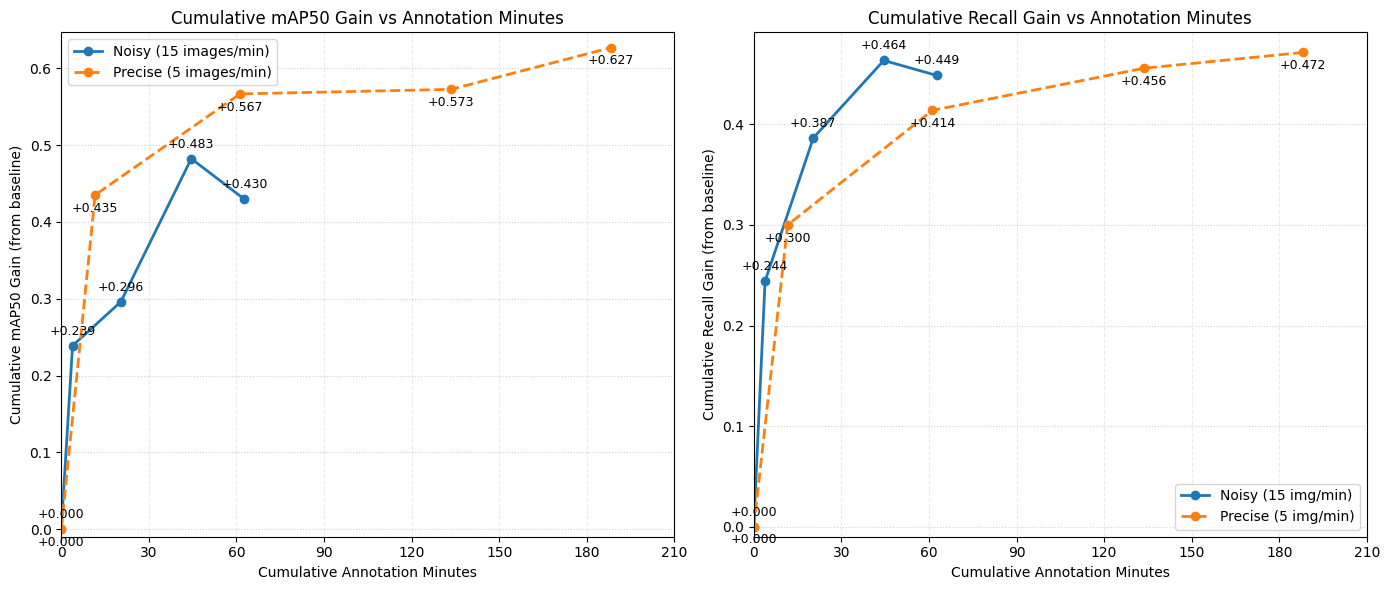

In [8]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']

# mAP@50
map_noisy  = [0.310690, 0.549506, 0.606697, 0.793206, 0.740331]
map_precise = [0.310690, 0.745910, 0.877516, 0.883487, 0.937756]

# Recall
recall_noisy  = [0.465116, 0.709302, 0.851672, 0.928682, 0.913773]
recall_precise = [0.465116, 0.765116, 0.879070, 0.920930, 0.936656]

# cumulative annotated samples (baseline assumed 0)
samples_cumulative = np.array([0, 58, 306, 668, 941], dtype=float)

# annotation rates (samples per minute)
rate_noisy = 15.0
rate_precise = 5.0

# cumulative minutes (true x positions)
minutes_noisy = samples_cumulative / rate_noisy
minutes_precise = samples_cumulative / rate_precise

# gains from baseline
baseline_map = map_noisy[0]
map_gain_noisy = np.array(map_noisy) - baseline_map
map_gain_precise = np.array(map_precise) - baseline_map

baseline_recall = recall_noisy[0]
recall_gain_noisy = np.array(recall_noisy) - baseline_recall
recall_gain_precise = np.array(recall_precise) - baseline_recall

# -------------------------
# Plot side-by-side with nice x-axis up to 190 minutes
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: mAP@50 gain
ax = axes[0]
ax.plot(minutes_noisy, map_gain_noisy, marker='o', linestyle='-', linewidth=2, label='Noisy (15 images/min)')
ax.plot(minutes_precise, map_gain_precise, marker='o', linestyle='--', linewidth=2, label='Precise (5 images/min)')

# annotate numeric values at points (no iteration text)
for i in range(len(labels)):
    ax.annotate(f"{map_gain_noisy[i]:+.3f}",
                (minutes_noisy[i], map_gain_noisy[i]),
                textcoords="offset points", xytext=(0,8), ha='center', fontsize=9)
    ax.annotate(f"{map_gain_precise[i]:+.3f}",
                (minutes_precise[i], map_gain_precise[i]),
                textcoords="offset points", xytext=(0,-12), ha='center', fontsize=9)

ax.set_title('Cumulative mAP50 Gain vs Annotation Minutes')
ax.set_xlabel('Cumulative Annotation Minutes')
ax.set_ylabel('Cumulative mAP50 Gain (from baseline)')
ax.grid(True, axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper left')

# Right: Recall gain
ax = axes[1]
ax.plot(minutes_noisy, recall_gain_noisy, marker='o', linestyle='-', linewidth=2, label='Noisy (15 img/min)')
ax.plot(minutes_precise, recall_gain_precise, marker='o', linestyle='--', linewidth=2, label='Precise (5 img/min)')

for i in range(len(labels)):
    ax.annotate(f"{recall_gain_noisy[i]:+.3f}",
                (minutes_noisy[i], recall_gain_noisy[i]),
                textcoords="offset points", xytext=(0,8), ha='center', fontsize=9)
    ax.annotate(f"{recall_gain_precise[i]:+.3f}",
                (minutes_precise[i], recall_gain_precise[i]),
                textcoords="offset points", xytext=(0,-12), ha='center', fontsize=9)

ax.set_title('Cumulative Recall Gain vs Annotation Minutes')
ax.set_xlabel('Cumulative Annotation Minutes')
ax.set_ylabel('Cumulative Recall Gain (from baseline)')
ax.grid(True, axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='lower right')

# -------------------------
# Nice, rounded x-axis ticks and bounds
# -------------------------
x_max = 190.0
nice_ticks = np.array([0, 30, 60, 90, 120, 150, 180, 210])

for ax in axes:
    ax.set_xlim(0.0, x_max)
    ax.set_xticks(nice_ticks)
    ax.set_xticklabels([str(int(t)) for t in nice_ticks])
    ax.xaxis.grid(True, linestyle='--', alpha=0.25)

# reasonable y-limits with padding per subplot
axes[0].set_ylim((min(map_gain_noisy.min(), map_gain_precise.min()) - 0.01,
                  max(map_gain_noisy.max(), map_gain_precise.max()) + 0.02))
axes[1].set_ylim((min(recall_gain_noisy.min(), recall_gain_precise.min()) - 0.01,
                  max(recall_gain_noisy.max(), recall_gain_precise.max()) + 0.02))

plt.tight_layout()
plt.show()


Saved plot to: /vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation/mAP50_gain_vs_minutes_monotone_origin.svg


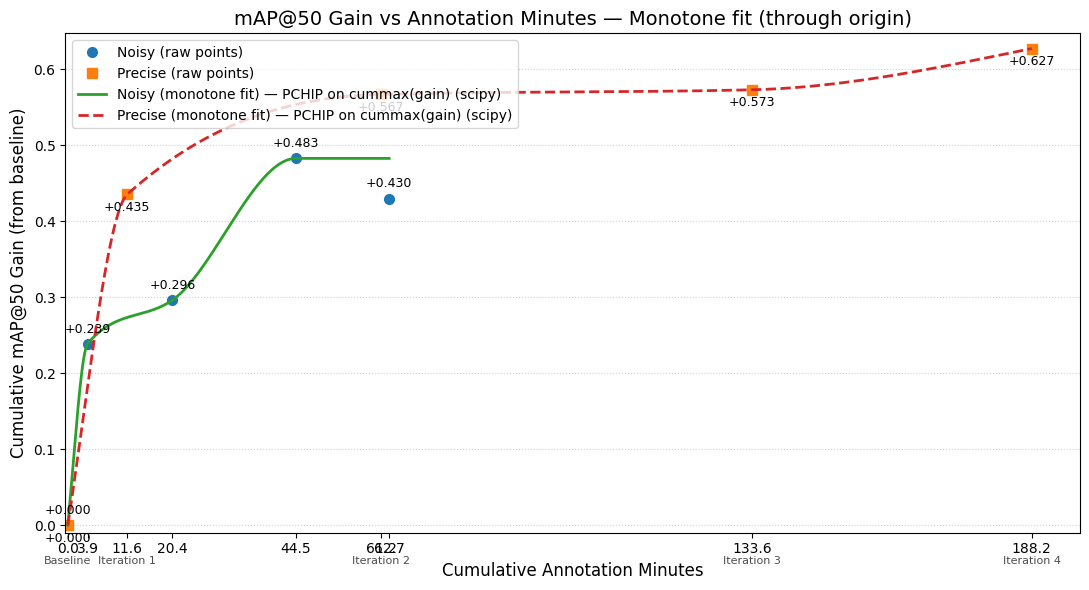

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Data (your inputs)
# -------------------------
labels = ['Baseline', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']

map_noisy  = np.array([0.310690, 0.549506, 0.606697, 0.793206, 0.740331])
map_precise = np.array([0.310690, 0.745910, 0.877516, 0.883487, 0.937756])

# cumulative annotated samples (baseline assumed 0)
samples_cumulative = np.array([0, 58, 306, 668, 941])

# annotation rates (samples / minute)
rate_noisy = 15.0
rate_precise = 5.0

minutes_noisy = samples_cumulative / rate_noisy
minutes_precise = samples_cumulative / rate_precise

# Gains from baseline (baseline point is 0 at minute 0)
baseline_map = map_noisy[0]
gain_noisy = map_noisy - baseline_map
gain_precise = map_precise - baseline_map

# Fine x grid for smooth plotting (ensures start at 0 -> passes through origin)
x_fine_noisy = np.linspace(0.0, minutes_noisy.max(), 500)
x_fine_precise = np.linspace(0.0, minutes_precise.max(), 500)

# Container for the fitted curves and method names
y_fit_noisy = None
y_fit_precise = None
method_used = {"noisy": None, "precise": None}

# -------------------------
# Preferred route: sklearn.IsotonicRegression + scipy.PchipInterpolator
# (isotonic ensures monotonicity AND will honor the (0,0) knot)
# -------------------------
from scipy.interpolate import PchipInterpolator
# enforce monotonicity by taking cumulative maximum of the observed gains (so non-decreasing knots)
knots_noisy_y = np.maximum.accumulate(gain_noisy)
knots_precise_y = np.maximum.accumulate(gain_precise)
# Build PCHIP on those monotone knots (knots include origin)
pchip_noisy = PchipInterpolator(minutes_noisy, knots_noisy_y, axis=0)
pchip_precise = PchipInterpolator(minutes_precise, knots_precise_y, axis=0)
y_fit_noisy = pchip_noisy(x_fine_noisy)
y_fit_precise = pchip_precise(x_fine_precise)
method_used["noisy"] = "PCHIP on cummax(gain) (scipy)"
method_used["precise"] = "PCHIP on cummax(gain) (scipy)"

# Safety: ensure the fits start exactly at zero (origin)
# (should already be true because knots included origin or model had no intercept)
if y_fit_noisy is not None:
    y_fit_noisy = np.asarray(y_fit_noisy, dtype=float)
    y_fit_noisy[0] = 0.0
if y_fit_precise is not None:
    y_fit_precise = np.asarray(y_fit_precise, dtype=float)
    y_fit_precise[0] = 0.0

# -------------------------
# Plot results
# -------------------------
fig, ax = plt.subplots(figsize=(11, 6))

# raw points
ax.plot(minutes_noisy, gain_noisy, 'o', label='Noisy (raw points)', markersize=7)
ax.plot(minutes_precise, gain_precise, 's', label='Precise (raw points)', markersize=7)

# fitted monotone curves (through origin)
ax.plot(x_fine_noisy, y_fit_noisy, '-', linewidth=2, label=f'Noisy (monotone fit) — {method_used["noisy"]}')
ax.plot(x_fine_precise, y_fit_precise, '--', linewidth=2, label=f'Precise (monotone fit) — {method_used["precise"]}')

# annotate iteration points
for i, lab in enumerate(labels):
    ax.annotate(f"{gain_noisy[i]:+.3f}", (minutes_noisy[i], gain_noisy[i]),
                textcoords="offset points", xytext=(0,8), ha='center', fontsize=9)
    ax.annotate(f"{gain_precise[i]:+.3f}", (minutes_precise[i], gain_precise[i]),
                textcoords="offset points", xytext=(0,-12), ha='center', fontsize=9)
    ax.annotate(lab, (minutes_precise[i], 0),
                textcoords="offset points", xytext=(0,-28), ha='center', fontsize=8, alpha=0.7)

ax.set_xlabel('Cumulative Annotation Minutes', fontsize=12)
ax.set_ylabel('Cumulative mAP@50 Gain (from baseline)', fontsize=12)
ax.set_title('mAP@50 Gain vs Annotation Minutes — Monotone fit (through origin)', fontsize=14)
ax.grid(True, axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper left')

# axis limits and ticks
x_max = max(minutes_noisy.max(), minutes_precise.max())
ax.set_xlim(-0.5, x_max * 1.05)
y_min = min(gain_noisy.min(), gain_precise.min(), np.min(y_fit_noisy), np.min(y_fit_precise))
y_max = max(gain_noisy.max(), gain_precise.max(), np.max(y_fit_noisy), np.max(y_fit_precise))
ax.set_ylim(y_min - 0.01, y_max + 0.02)

tick_positions = sorted(set(np.round(np.concatenate([minutes_noisy, minutes_precise]), 2)))
ax.set_xticks(tick_positions)
ax.set_xticklabels([f"{t:.1f}" for t in tick_positions])

plt.tight_layout()

# save to your evaluation directory (create it if missing)
outdir = '/vol/biomedic3/bglocker/ugproj/tk1420/SharkTrack-Dev/evaluation'
os.makedirs(outdir, exist_ok=True)
outpath = os.path.join(outdir, 'mAP50_gain_vs_minutes_monotone_origin.svg')
plt.savefig(outpath, format='svg')
print(f"Saved plot to: {outpath}")

plt.show()
